Machine Learning CIA

Aditya Kumar Singh

23122003

3MScDSA

## Clustering players based on their performance and Statistics to predict their draft chances


Dataset description

The dataset `edit.csv` contains basketball player statistics for a particular season. This data is used to analyze player performance and predict their draft potential using machine learning techniques.

#### Columns:

1. **player_name**: Name of the player.
2. **pts**: Average points scored per game.
3. **eFG**: Effective Field Goal Percentage.
4. **TS_per**: True Shooting Percentage.
5. **twoP_per**: Two-Point Field Goal Percentage.
6. **TP_per**: Three-Point Field Goal Percentage.
7. **ORB_per**: Offensive Rebound Percentage.
8. **DRB_per**: Defensive Rebound Percentage.
9. **treb**: Total Rebounds per Game.
10. **AST_per**: Assist Percentage.
11. **TO_per**: Turnover Percentage.
12. **stl_per**: Steal Percentage.
13. **blk_per**: Block Percentage.
14. **usage_rate**: Usage Rate.
15. **Ortg**: Offensive Rating.
16. **ogbpm**: Offensive Box Plus-Minus.
17. **dgbpm**: Defensive Box Plus-Minus.
18. **Min_per**: Minutes per Game.
19. **GamesPlayed**: Number of games played.
20. **ftr**: Free Throw Rate.
21. **dporpag**: Defensive points over replacement player per game.
22. **porpag**: Points over replacement player per game.
23. **FT_per**: Free Throw Percentage.

This dataset enables various analyses, such as evaluating player performance and predicting draft potential.

Loading the dataset

In [1]:
import pandas as pd

df= pd.read_csv('edit.csv')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_16944\1159245212.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,player_name,team,conference,GamesPlayed,Min_per,Ortg,usage_rate,eFG,TS_per,ORB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Position
0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,...,-7.49472,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G
1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,...,2.89361,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G
2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,9.1,...,2.78785,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G
3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,5.8,...,5.22379,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4
4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,7.0,...,-1.25322,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,Aquan Smart,FIU,CUSA,21,11.7,69.4,17.7,32.1,36.08,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3974,Chase Barrs,Florida A&M,SWAC,14,11.0,85.1,8.8,42.9,40.61,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3975,Hugo Clarkin,Sacramento St.,BSky,16,22.8,99.7,7.8,70.6,68.67,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3976,James Graham III,Maryland,B10,7,1.8,9.4,17.1,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['player_name', 'team', 'conference', 'GamesPlayed', 'Min_per', 'Ortg',
       'usage_rate', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per',
       'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM',
       'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ogbpm', 'dgbpm',
       'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'Position'],
      dtype='object')

## Some EDA and Visualisations

In [3]:
# Sort the DataFrame by 'ppg' in descending order
sorted_df = df.sort_values(by='pts', ascending=False)

# Select the 'name' and 'ppg' columns from the top 60 rows
top_60 = sorted_df[['player_name', 'pts']].head(60)

# Display the resulting DataFrame
print(top_60)

                 player_name      pts
367               John Meeks  25.3333
2460               Max Abmas  24.6071
1289           Antoine Davis  23.9545
908                 AJ Green  22.3333
360            Stanley Umude  21.5200
2217           Davion Warren  21.2000
1901               AJ Bramah  21.0000
566          Michael Flowers  21.0000
2097       Scotty Pippen Jr.  20.7727
2410     John-Michael Wright  20.7273
580             Jamir Harris  20.5000
3605        Darrion Trammell  20.4783
270   Phlandrous Fleming Jr.  20.1111
2200           Isiaih Mosley  19.7917
2148       Julian Champagnie  19.7600
704           Taevion Kinsey  19.5455
186              Marcus Carr  19.4138
213                Jalen Ray  19.3478
942           DeVante' Jones  19.3462
1241             Zach Nutall  19.3214
1298         Cameron Shelton  19.1818
416              Souley Boum  19.1739
1264           Jase Townsend  19.1500
410              Remy Martin  19.1304
1679            James Bishop  19.1176
1935    Tray

In [4]:
top_60 = sorted_df[['player_name', 'pts', 'team']].head(60)

# Sort the top 60 rows by the 'college' column
top_60_sorted = top_60.sort_values(by='team')

# Group the top 60 rows by 'college' and sort within each group by 'ppg'
top_60_grouped = top_60_sorted.groupby('team', sort=False).apply(lambda x: x.sort_values(by='pts', ascending=False))

# Reset the index and display the resulting DataFrame
print(top_60_grouped.reset_index(drop=True))

               player_name      pts                   team
0          Marreon Jackson  18.1000            Arizona St.
1            Stanley Umude  21.5200               Arkansas
2       Jeenathan Williams  17.4800                Buffalo
3             Jahmir Young  17.9600              Charlotte
4               John Meeks  25.3333  College of Charleston
5            Antoine Davis  23.9545                Detroit
6   Phlandrous Fleming Jr.  20.1111                Florida
7             James Bishop  19.1176      George Washington
8              Kaiden Rice  17.6400             Georgetown
9               Drew Timme  19.0000                Gonzaga
10     John-Michael Wright  20.7273             High Point
11               Jalen Ray  19.3478                Hofstra
12         Dontarius James  17.4545                 Howard
13           Kofi Cockburn  17.6774               Illinois
14    Trayce Jackson-Davis  19.1111                Indiana
15             Remy Martin  19.1304                 Kans

C:\Users\HP\AppData\Local\Temp\ipykernel_16944\1525147912.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_60_grouped = top_60_sorted.groupby('team', sort=False).apply(lambda x: x.sort_values(by='pts', ascending=False))


In [5]:
import pandas as pd

# Load the CSV file
file_path = 'edit.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  3978 non-null   object 
 1   team         3978 non-null   object 
 2   conference   3978 non-null   object 
 3   GamesPlayed  3978 non-null   int64  
 4   Min_per      3978 non-null   float64
 5   Ortg         3978 non-null   float64
 6   usage_rate   3978 non-null   float64
 7   eFG          3978 non-null   float64
 8   TS_per       3978 non-null   float64
 9   ORB_per      3978 non-null   float64
 10  DRB_per      3978 non-null   float64
 11  AST_per      3978 non-null   float64
 12  TO_per       3978 non-null   float64
 13  FTM          3978 non-null   int64  
 14  FTA          3978 non-null   int64  
 15  FT_per       3978 non-null   float64
 16  twoPM        3978 non-null   int64  
 17  twoPA        3978 non-null   int64  
 18  twoP_per     3978 non-null   float64
 19  TPM   

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


player_name      0
team             0
conference       0
GamesPlayed      0
Min_per          0
Ortg             0
usage_rate       0
eFG              0
TS_per           0
ORB_per          0
DRB_per          0
AST_per          0
TO_per           0
FTM              0
FTA              0
FT_per           0
twoPM            0
twoPA            0
twoP_per         0
TPM              0
TPA              0
TP_per           0
blk_per          0
stl_per          0
ftr              0
yr               0
ogbpm          191
dgbpm          191
oreb           189
dreb           189
treb           189
ast            189
stl            189
blk            189
pts            189
Position       195
dtype: int64


Data Preprocessing

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
data = pd.read_csv('edit.csv')

# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Mean/Median/Mode Imputation
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer.fit_transform(data[categorical_features])


# Feature Engineering (create missing value indicator)
for feature in data.columns:
    data[f'{feature}_missing'] = data[feature].isnull().astype(int)

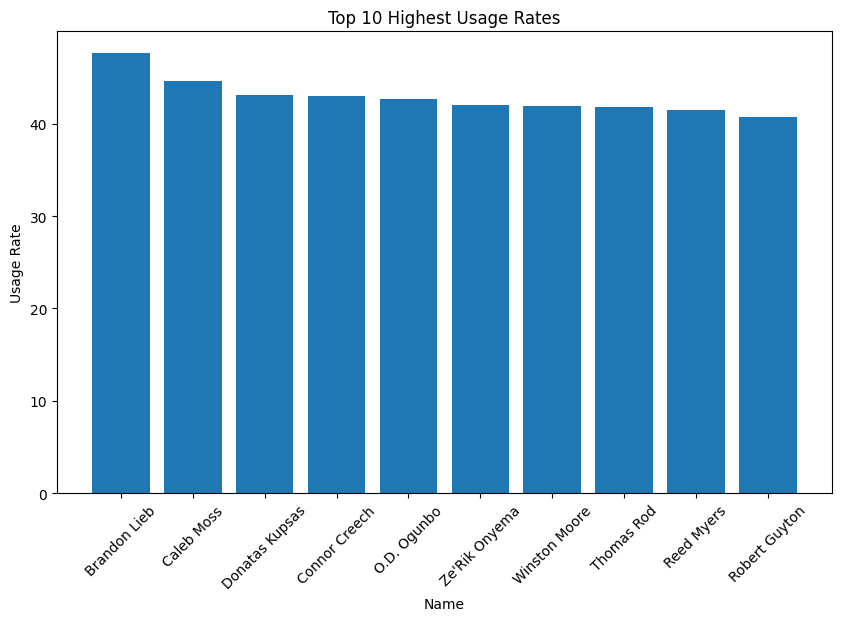

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that you haven't reassigned plt to something else in your code
# Load your dataset
df = pd.read_csv('edit.csv')  # Replace with your actual file path

# Sort the DataFrame by usage rate and select the top 10
top_usage = df.sort_values(by='usage_rate', ascending=False).head(10)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_usage['player_name'], top_usage['usage_rate'])  # Replace 'name' with the appropriate column for labels
plt.xlabel('Name')
plt.ylabel('Usage Rate')
plt.title('Top 10 Highest Usage Rates')
plt.xticks(rotation=45)
plt.show()


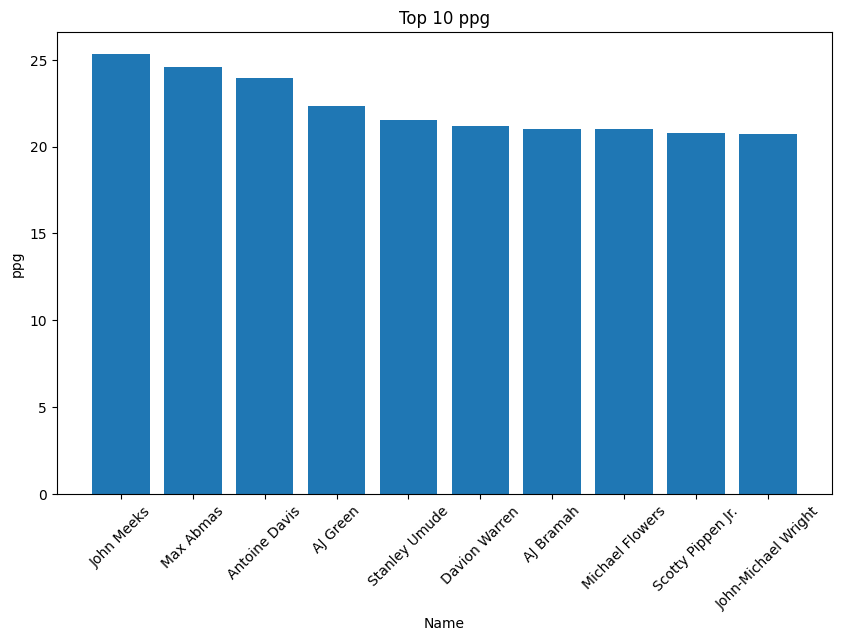

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that you haven't reassigned plt to something else in your code
# Load your dataset
df = pd.read_csv('edit.csv')  # Replace with your actual file path

# Sort the DataFrame by usage rate and select the top 10
top_usage = df.sort_values(by='pts', ascending=False).head(10)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_usage['player_name'], top_usage['pts'])  # Replace 'name' with the appropriate column for labels
plt.xlabel('Name')
plt.ylabel('ppg')
plt.title('Top 10 ppg')
plt.xticks(rotation=45)
plt.show()


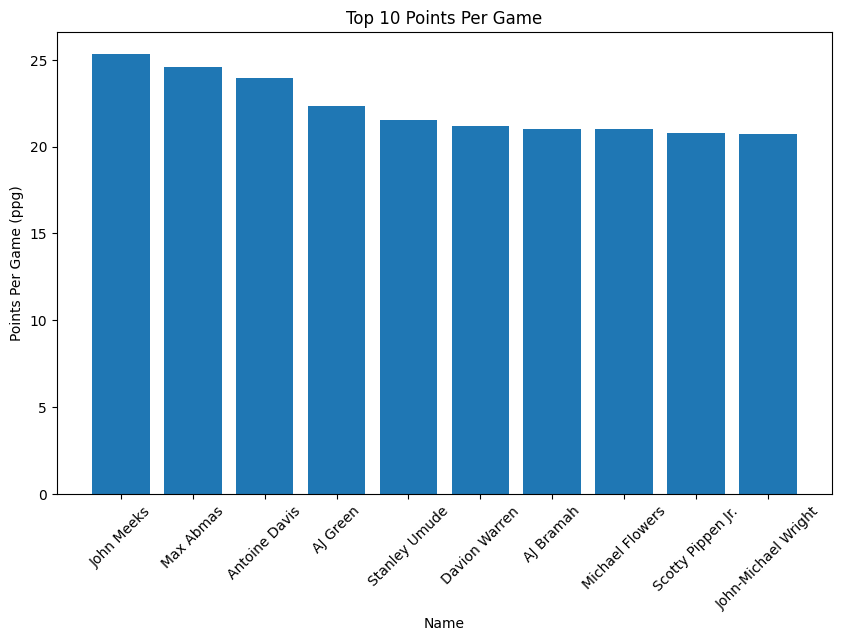

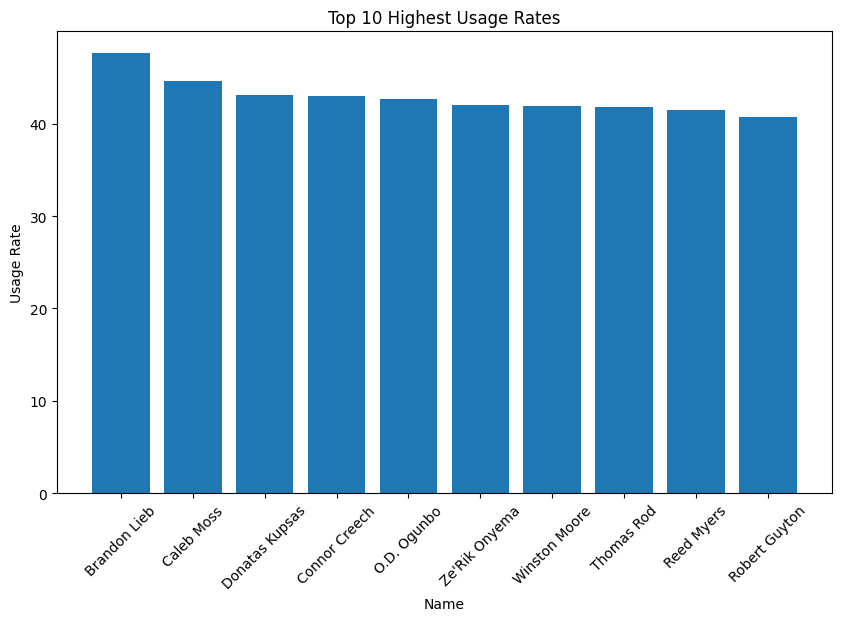

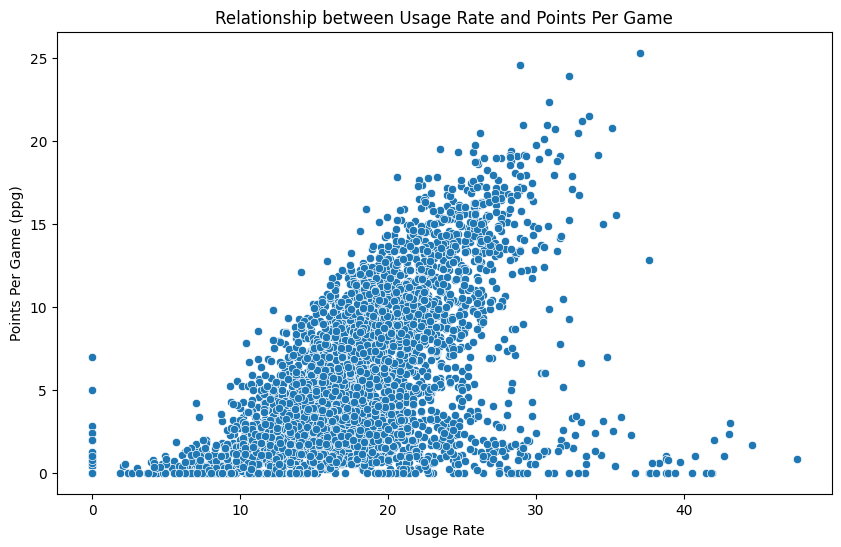

Correlation between Usage Rate and Points Per Game: 0.54


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('edit.csv')  # Replace with your actual file path

# Sort the DataFrame by points per game and usage rate, then select the top 10 for each
top_ppg = df.sort_values(by='pts', ascending=False).head(10)
top_usage = df.sort_values(by='usage_rate', ascending=False).head(10)

# Plot top 10 players by points per game (ppg)
plt.figure(figsize=(10, 6))
plt.bar(top_ppg['player_name'], top_ppg['pts'])  # Replace 'name' with the appropriate column for labels
plt.xlabel('Name')
plt.ylabel('Points Per Game (ppg)')
plt.title('Top 10 Points Per Game')
plt.xticks(rotation=45)
plt.show()

# Plot top 10 players by usage rate
plt.figure(figsize=(10, 6))
plt.bar(top_usage['player_name'], top_usage['usage_rate'])  # Replace 'name' with the appropriate column for labels
plt.xlabel('Name')
plt.ylabel('Usage Rate')
plt.title('Top 10 Highest Usage Rates')
plt.xticks(rotation=45)
plt.show()

# Create a scatter plot to visualize the relationship between usage rate and points per game
plt.figure(figsize=(10, 6))
sns.scatterplot(x='usage_rate', y='pts', data=df)
plt.xlabel('Usage Rate')
plt.ylabel('Points Per Game (ppg)')
plt.title('Relationship between Usage Rate and Points Per Game')
plt.show()

# Calculate the correlation coefficient
correlation = df['usage_rate'].corr(df['pts'])
print(f'Correlation between Usage Rate and Points Per Game: {correlation:.2f}')


## Clustering and Analysis

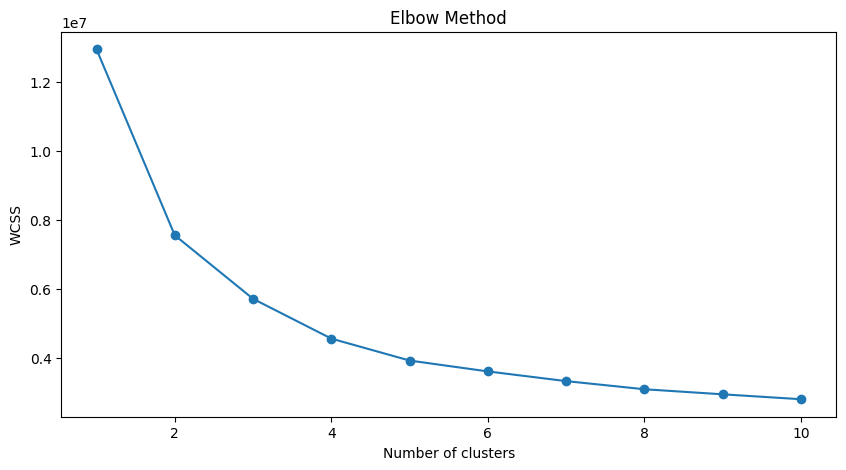

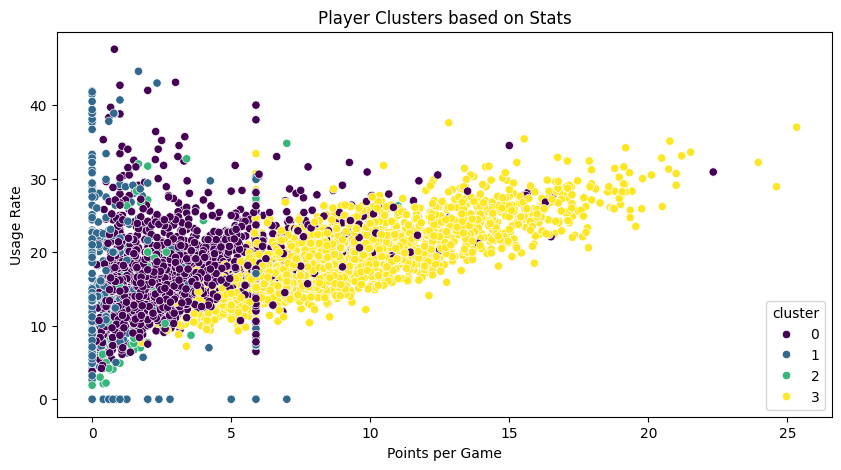

              player_name  cluster
0           Isaiah Felder        0
1     Jalen Coleman-Lands        3
2             K.J. Walton        3
3            Jeriah Horne        3
4              Eric Curry        0
...                   ...      ...
3973          Aquan Smart        0
3974          Chase Barrs        0
3975         Hugo Clarkin        0
3976     James Graham III        1
3977          Zane Butler        0

[3978 rows x 2 columns]


In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('edit.csv')


# Handle missing values for numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Mean imputation for numerical features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])


# Select relevant features for clustering
features = ['pts', 'eFG', 'TS_per', 'twoP_per', 'TP_per', 'ORB_per', 'DRB_per', 'treb', 'AST_per', 'TO_per', 'stl_per', 'blk_per', 'usage_rate', 'Ortg', 'ogbpm', 'dgbpm', 'Min_per', 'GamesPlayed']
X = df[features]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11, 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-Means model with the optimal number of clusters
optimal_clusters = 4  # You can choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='pts', y='usage_rate', hue='cluster', palette='viridis', data=df, legend='full')
plt.title('Player Clusters based on Stats')
plt.xlabel('Points per Game')
plt.ylabel('Usage Rate')
plt.show()

# Display the cluster assignments
print(df[['player_name', 'cluster']])


By clustering players based on their performance stats, we can identify groups of players with similar abilities and potentially predict their draft chances. This approach helps in understanding the relative performance levels of players and can be a valuable tool for making informed decisions about player evaluations and draft strategies.